In [25]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt

In [26]:
# Using pandas to import data from Excel

df1 = pd.read_csv('Frequency and Gain.csv', skiprows=1, names=['Frequency','Log_frequency','Vrms1','Vrms2','Gain','Log_gain'])

In [27]:
print(df1)

    Frequency  Log_frequency  Vrms1  Vrms2       Gain  Log_gain
0       5.568       0.745699  0.224  2.260  10.089286  1.003860
1       5.605       0.748576  0.226  2.280  10.088496  1.003826
2       5.656       0.752509  0.227  2.280  10.044053  1.001909
3       5.869       0.768564  0.230  2.320  10.086957  1.003760
4       6.281       0.798029  0.237  2.400  10.126582  1.005463
5       6.684       0.825036  0.244  2.460  10.081967  1.003545
6       7.022       0.846461  0.247  2.490  10.080972  1.003502
7       7.184       0.856366  0.246  2.480  10.081301  1.003517
8       7.353       0.866465  0.246  2.480  10.081301  1.003517
9       7.764       0.890086  0.244  2.450  10.040984  1.001776
10      7.962       0.901022  0.241  2.420  10.041494  1.001798
11      8.333       0.920801  0.236  2.370  10.042373  1.001836
12      8.562       0.932575  0.233  2.340  10.042918  1.001860
13      8.681       0.938570  0.231  2.330  10.086580  1.003744
14      9.191       0.963363  0.231  2.3

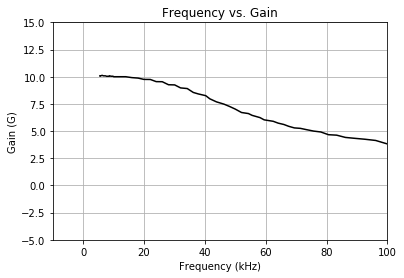

In [28]:
# Plotting Frequency vs. Gain

plt.style.use(['seaborn-pastel'])
plt.title('Frequency vs. Gain')
plt.ylabel('Gain (G)')
plt.xlabel('Frequency (kHz)')
pylab.xlim(-10, 100)
pylab.ylim(-5,15)
plt.grid()

plt.plot(df1.Frequency, df1.Gain, '-k')

plt.savefig('./freq-gain.svg')

C:\Users\Jack Sparrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RankWarning: Polyfit may be poorly conditioned


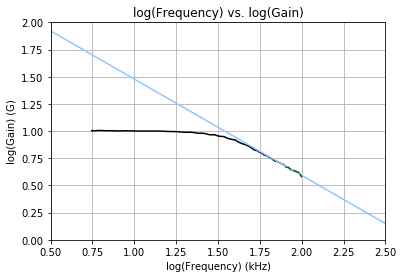

In [29]:
# Plotting Log of Frequency vs. Gain

Log_freq = np.array(df1.Log_frequency)
Log_gain = np.array(df1.Log_gain)

plt.style.use(['seaborn-pastel'])
plt.title('log(Frequency) vs. log(Gain)')
plt.ylabel('log(Gain) (G)')
plt.xlabel('log(Frequency) (kHz)')
pylab.xlim(.5, 2.5)
pylab.ylim(0,2)
plt.grid()

# Polyfit for log(Frequency) vs. log(Gain)

zlog = np.polyfit(Log_freq[49:],Log_gain[49:],1)
p = np.poly1d(zlog)
p30 = np.poly1d(np.polyfit(Log_freq[52:],Log_gain[52:], 30))
xp = np.linspace(.5, 2.5, 100)

plt.plot(df1.Log_frequency, df1.Log_gain, '-k')
plt.plot(xp, p(xp), '-',Log_freq[52:],Log_gain[52:], 'g--')

plt.savefig('./log-freq-gain.svg')

In [30]:
import scipy
from scipy import stats
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Log_freq[52:],Log_gain[52:])

print(slope)

# Possibly retake data
# Slope of log(Frequency) vs. log(Gain) should be -1 varying +/- 5%

-0.8661353819548727


In [31]:
df2 = pd.read_csv('Frequency and Gain New.csv', skiprows=1, names=['Frequency_new','Vrms1_new','Vrms2_new','Gain_new','Log_frequency_new','Log_gain_new'])

In [32]:
print(df2)

    Frequency_new  Vrms1_new  Vrms2_new   Gain_new  Log_frequency_new  \
0           1.000      0.226      2.270  10.044248           0.000000   
1           2.083      0.227      2.280  10.044053           0.318689   
2           2.941      0.227      2.280  10.044053           0.468495   
3           4.167      0.228      2.280  10.000000           0.619823   
4           5.000      0.227      2.270  10.000000           0.698970   
5           5.953      0.227      2.260   9.955947           0.774736   
6           6.944      0.227      2.250   9.911894           0.841610   
7           8.065      0.229      2.280   9.956332           0.906604   
8           8.292      0.228      2.280  10.000000           0.918659   
9          10.000      0.226      2.260  10.000000           1.000000   
10         10.960      0.230      2.300  10.000000           1.039811   
11         12.020      0.230      2.290   9.956522           1.079904   
12         12.820      0.228      2.270   9.956140 

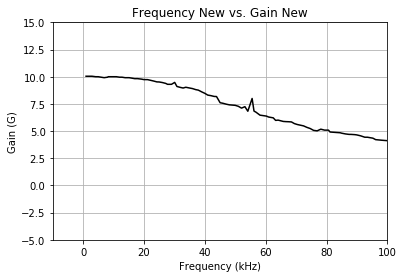

In [42]:
# Plotting Frequency New vs. Gain New

plt.style.use(['seaborn-pastel'])
plt.title('Frequency New vs. Gain New')
plt.ylabel('Gain (G)')
plt.xlabel('Frequency (kHz)')
pylab.xlim(-10, 100)
pylab.ylim(-5,15)
plt.grid()

plt.plot(df2.Frequency_new, df2.Gain_new, '-k')


C:\Users\Jack Sparrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RankWarning: Polyfit may be poorly conditioned


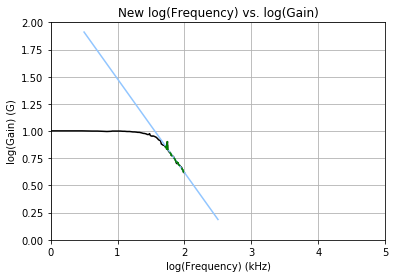

In [35]:
# Plotting Log of new Frequency vs. Gain

Log_freq_new = np.array(df2.Log_frequency_new)
Log_gain_new = np.array(df2.Log_gain_new)

plt.style.use(['seaborn-pastel'])
plt.title('New log(Frequency) vs. log(Gain)')
plt.ylabel('log(Gain) (G)')
plt.xlabel('log(Frequency) (kHz)')
pylab.xlim(0, 5)
pylab.ylim(0,2)
plt.grid()

# Polyfit for new log(Frequency) vs. log(Gain)

zlognew = np.polyfit(Log_freq_new[50:],Log_gain_new[50:],1)
p = np.poly1d(zlognew)
p30 = np.poly1d(np.polyfit(Log_freq_new[50:],Log_gain_new[50:], 30))
xp = np.linspace(.5, 2.5, 100)

plt.plot(df2.Log_frequency_new, df2.Log_gain_new, '-k')
plt.plot(xp, p(xp), '-',Log_freq_new[50:],Log_gain_new[50:], 'g--')

plt.savefig('./log-freq-gain-new.svg')

In [39]:
import scipy
from scipy import stats
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Log_freq_new[50:],Log_gain_new[50:])

print(slope)

-0.8620133685813137


In [22]:
# May need to take more data
# Theory should fit after more conclusive data